### Simple Linear Regression Example 2.4

We are interested in the values of $ \hat{\beta}_{0} $ and $ \hat{\beta}_{1} $ for the **Advertising** data. By means of the **Python**-function **OLS()**, we can easily determine those values:

In [6]:
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_csv('./data/Advertising.csv')
x = df['TV']
y = df['sales']

# Linear Regression using statsmodels.api
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()

# Now we can print a summary, 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.47e-42
Time:                        08:34:12   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

The coefficients are listed under **(coef)**. Here **const** corresponds to $ \hat{\beta}_{0} $, thus to the intercept with the $ y $-axis, and the **TV** corresponds to the slope of the regression line, thus to $ \hat{\beta}_{1} $.

###  Alternative solution using sklearn.linear_model:

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = [[x[i]] for i in range(len(x))]

# Linear Regression using sklearn
linreg = LinearRegression()
linreg.fit(x, y)

print('Coefficients: \n', np.round(linreg.coef_, 4),
      '\nIntercept: \n', np.round(linreg.intercept_, 4))

Coefficients: 
 [0.0475] 
Intercept: 
 7.0326


Our regression model then is given by
\begin{equation*}
Y
\approx 7.03+0.0475X
\end{equation*}
According to this approximation, an additional CHF 1000 spent on TV advertising is associated with selling approximately 47.5 additional units of the product. 


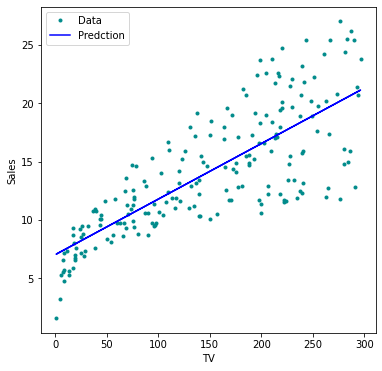

In [3]:
import matplotlib.pyplot as plt

# Predicted y
y_pred = model.predict(x_sm)

# Create figure and plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(df['TV'], y, marker='o', linestyle='None', 
         color='darkcyan', markersize='3', label="Data")
plt.plot(df['TV'], y_pred, 'b-', label="Predction")
# Set labels and Legend
ax.set_xlabel('TV')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

1. The **Python**-function **statsmodels.api.OLS()** uses Ordinary Least Squares to fit the *linear model*.
1. Be aware of the (default) order of the function parameters **x** and **y** in **sm.OLS(y, x)**.
1. If **x** is a one-dimensional vector, it needs to be preprocessed using **sm.add\_constant(x)**.

In [5]:
np.sqrt(model.mse_resid)

3.258656368650463